# **Reduces Dataset to 3 Classes**

In [2]:
import os
import shutil

In [3]:
# Mounts Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Unzips the dataset
!unzip -q '/content/drive/MyDrive/AI Society/simpsons_dataset.zip'

# Stores a path to the dataset
dataset_dir = '/content/simpsons_dataset'

# Stores a list of all the classes in the dataset
all_classes = os.listdir(dataset_dir)

# Stores a list of 3 classes to keep
classes_to_keep = ['bart_simpson', 'krusty_the_clown', 'apu_nahasapeemapetilon']

# Iterates through all the classes and removes the ones not to keep
for class_name in all_classes:
    class_dir = os.path.join(dataset_dir, class_name)

    if os.path.isdir(class_dir) and class_name not in classes_to_keep:
        shutil.rmtree(class_dir)

# **Prepares Data**

In [5]:
import tensorflow as tf

In [6]:
# Creates an ImageDataGenerator to prepare the images for training and testing
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1./255,         # Normalizes pixel values to [0, 1]
    validation_split = 0.2    # Reserves 20% of images for testing
)

# Uses the ImageDataGenerator to load and prepare images for training
train_generator = datagen.flow_from_directory(
    dataset_dir,                 # Path to dataset
    target_size = (224, 224),    # Resizes images to 224x224
    class_mode = 'categorical',  # For multi-class classification
    subset = 'training',         # Use for training
    batch_size = 64              # Sets batch size to 64
)

# Uses the ImageDataGenerator to load and prepare images for testing
test_generator = datagen.flow_from_directory(
    dataset_dir,                 # Path to dataset
    target_size = (224, 224),    # Resizes images to 224x224
    class_mode = 'categorical',  # For multi-class classification
    subset = 'validation'        # Use for testing
)

Found 2538 images belonging to 3 classes.
Found 633 images belonging to 3 classes.


#**Builds, Trains & Tests your CNN**

In [8]:
# Builds the model
CNN_model = tf.keras.Sequential()
CNN_model.add(tf.keras.Input(shape=(224, 224, 3)))
CNN_model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
CNN_model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
CNN_model.add(tf.keras.layers.MaxPooling2D())
CNN_model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
CNN_model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
CNN_model.add(tf.keras.layers.MaxPooling2D())
CNN_model.add(tf.keras.layers.Flatten())
CNN_model.add(tf.keras.layers.Dense(512, activation='relu'))
CNN_model.add(tf.keras.layers.Dense(3, activation='softmax'))

# Compiles the model
sgd = tf.keras.optimizers.SGD(0.01, momentum=0.9, decay=0.01/10, nesterov=False)
CNN_model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

# Trains the model
train_history = CNN_model.fit(train_generator, epochs=10)

# Evaluates the model on the test data
loss, accuracy = CNN_model.evaluate(test_generator)
print(f'Test model loss: {round(loss,4)}')
print(f'Test model accuracy: {round(100*accuracy,2)}%')

Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 25s 560ms/step - accuracy: 0.5287 - loss: 0.9260
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 9s 200ms/step - accuracy: 0.7985 - loss: 0.5537
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 10s 228ms/step - accuracy: 0.8634 - loss: 0.3846
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 10s 216ms/step - accuracy: 0.9172 - loss: 0.2293
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 9s 206ms/step - accuracy: 0.9471 - loss: 0.1423
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 11s 214ms/step - accuracy: 0.9655 - loss: 0.1200
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 11s 233ms/step - accuracy: 0.9644 - loss: 0.1147
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 9s 200ms/step - accuracy: 0.9786 - loss: 0.0638
Epoch 9/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 10s 197ms/step - accuracy: 0.9817 - loss: 0.0659
Epoch 10/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 11s 222ms/step - accuracy: 0.9913 - loss: 0.0376
20/20 ━━━━━━━━━━━━━━━━━━━━ 8s 216ms/step - accuracy: 0.9062 - loss: 0.5311
Test model loss: 0.6917
Test model accuracy: 89.26%


#**Plots Parameters Table**

In [9]:
# Plots a parameters table
CNN_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 224, 224, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 224, 224, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 112, 112, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 112, 112, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 200704)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │     102,760,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 3)                   │           1,539 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 205,656,136 (784.52 MB)

 Trainable params: 102,828,067 (392.26 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 102,828,069 (392.26 MB)

#**Applies the Model**

In [10]:
import numpy as np
import matplotlib.pyplot as plt

In [11]:
# Creates an ImageDataGenerator to prepare the images for the model
datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

# Uses the ImageDataGenerator to load and prepare images for the model
prediction_data_generator = datagen.flow_from_directory(
    '/content/simpsons_dataset',  # Path to dataset
    target_size=(224, 224),       # Resizes images to 224x224
    class_mode=None,              # For making predictions
    shuffle=True                  # Shuffles images
)

# Maps class indexes to class labels
class_indices = prediction_data_generator.class_indices
class_labels = {v: k for k, v in class_indices.items()}

Found 3171 images belonging to 3 classes.


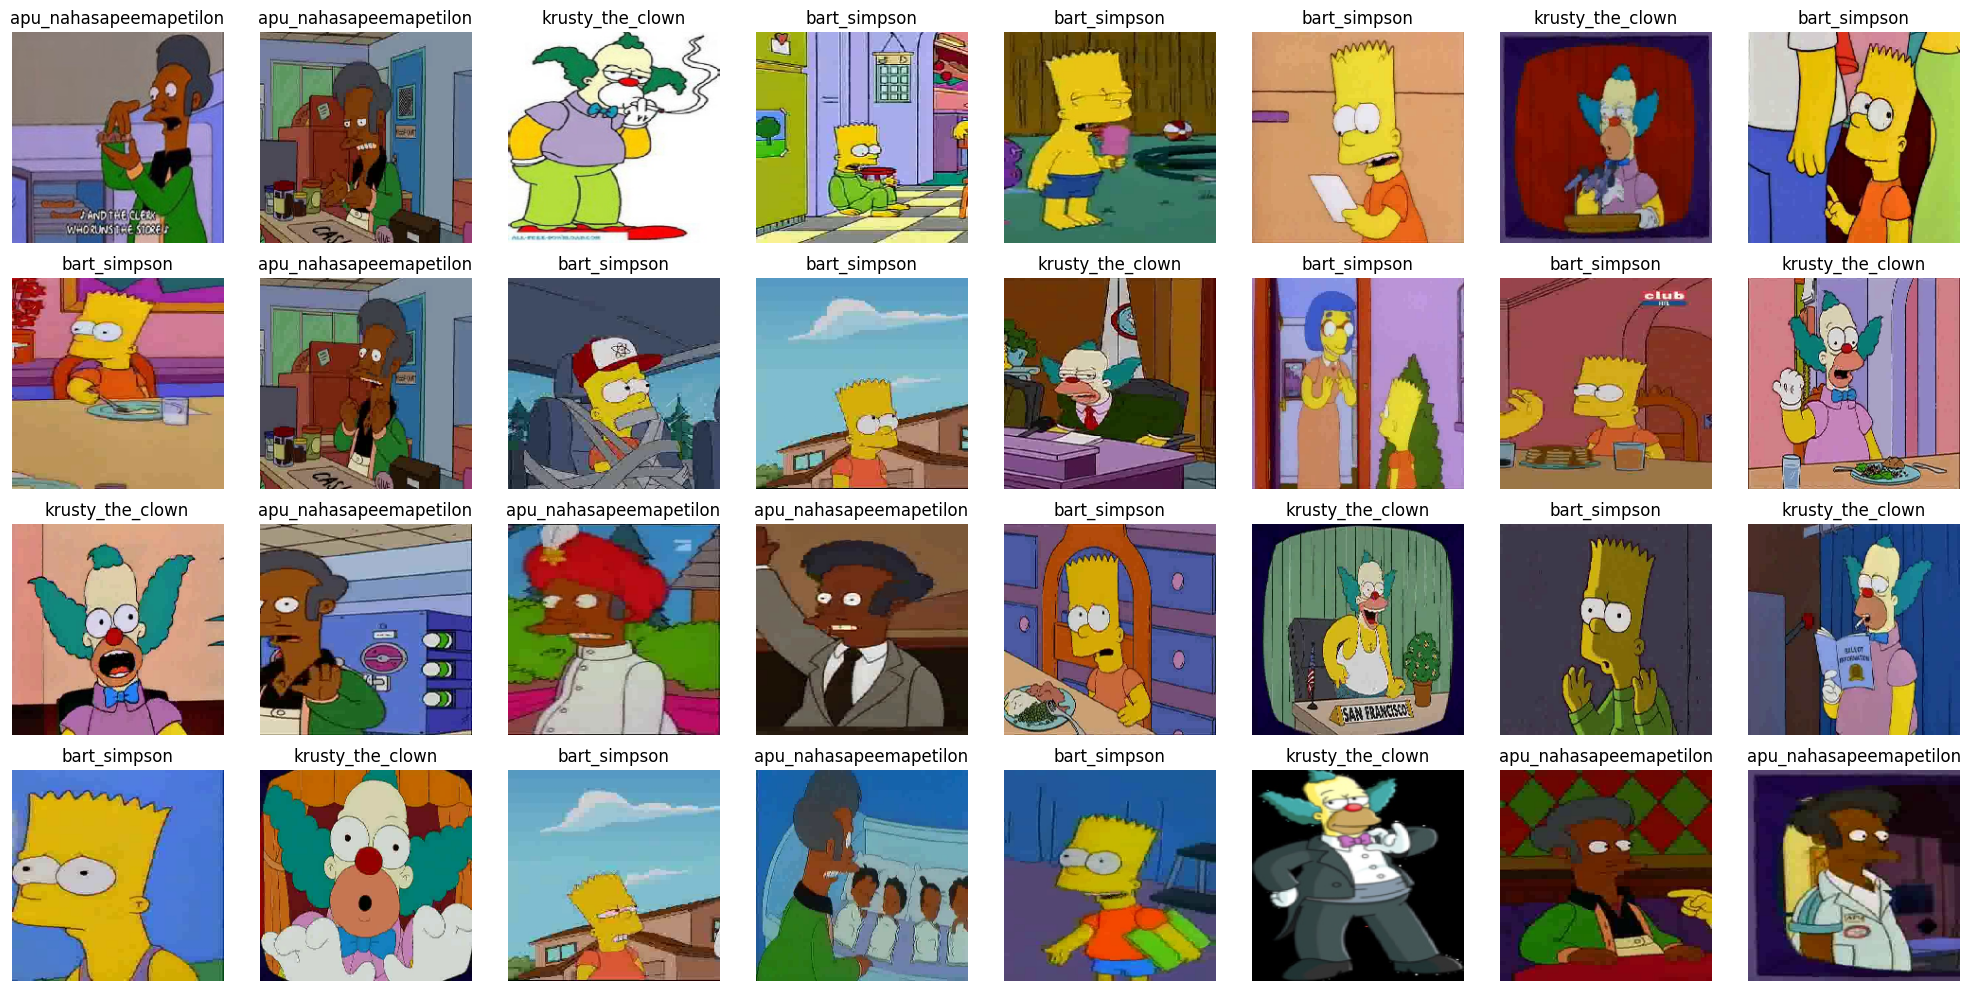

In [12]:
# Creates a 20x10 figure with 4 rows and 8 columns
fig, axes = plt.subplots(4, 8, figsize=(20, 10))
axes = axes.flatten()

# Loops through 32 images
for i in range(32):
    # Gets the next image
    image = next(prediction_data_generator)

    # Predicts the character in the image
    prediction = CNN_model.predict(image, verbose = 0)
    predicted_class = np.argmax(prediction, axis=1)[0]

    # Plots the image and its predicted character within the figure
    ax = axes[i]
    ax.imshow(image[0])
    ax.set_title(f'{class_labels[predicted_class]}')
    ax.axis('off')

# Displays the figure
plt.tight_layout()
plt.show()